# Title

## 732A92 Text Mining

Chenjianshi

2022-06-07

## Data Access

In [1]:
from datetime import datetime

### Google Play

In [2]:
from google_play_scraper import Sort, reviews_all
import pandas as pd


# def scrap_data(score,data_csv,country):
#     result = reviews_all(
#         'com.miHoYo.GenshinImpact',
#         sleep_milliseconds=0,  # defaults to 0
#         lang='en',  # defaults to 'en'
#         country=country,  # defaults to 'us'
#         sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
#         filter_score_with=score  # defaults to None(means all score)
#     )

#     for i in range(len(result)):
#         temp = pd.DataFrame({'Time': result[i]["at"], 'Score': result[i]["score"], 'Content': result[i]['content']},
#                             index=[0])

#         data_csv = data_csv.append(temp, ignore_index=True)
#         pass
#     return data_csv


# def scrap_data_to_csv(country):
#     data_csv = pd.DataFrame(columns=['Time', 'Score', 'Content'])
#     print('Scrapping 5 score data')
#     data_csv = scrap_data(5, data_csv, country)
#     print('Scrapping 4 score data')
#     data_csv = scrap_data(4, data_csv, country)
#     print('Scrapping 3 score data')
#     data_csv = scrap_data(3, data_csv, country)
#     print('Scrapping 2 score data')
#     data_csv = scrap_data(2, data_csv, country)
#     print('Scrapping 1 score data')
#     data_csv = scrap_data(1, data_csv, country)
#     print('Saving data')
#     data_len = len(data_csv)
#     filename = 'data_' + (str(data_len )[:2]) + 'k_' + country + '.xlsx'
#     data_csv.to_excel(filename, index=False)
#     pass


# run
# scrap_data_to_csv('us')

### Twitter

In [3]:
# import twint

# # Configure
# c = twint.Config()


# c.Search = "GenshinImpact"
# c.Limit = 1500
# c.Store_csv = True
# c.Lang = 'en'
# c.Since= '2021-09-29'
# c.Until= '2022-01-10'
# c.Lowercase = True
# c.Output = "Output.csv"



# Run
# twint.run.Search(c)

# c.Pandas = True

# df = twint.storage.panda.Tweets_df

## Data Overview

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

In [5]:
data = pd.read_excel('data_38k_us.xlsx')

In [6]:
data

Time  Score  \
0     2022-01-05 04:22:08      5   
1     2022-01-07 04:54:02      5   
2     2022-01-08 00:08:37      5   
3     2022-01-04 23:52:11      5   
4     2022-01-05 01:08:32      5   
...                   ...    ...   
38593 2021-10-14 09:23:25      1   
38594 2021-09-29 11:21:58      1   
38595 2021-09-29 05:19:42      1   
38596 2021-09-28 20:33:23      1   
38597 2021-09-29 11:05:05      1   

                                                 Content  
0      I literally love this game. Playing on a phone...  
1      The game itself is wonderful and enchanting, I...  
2      This is an amazing game it has amazing graphic...  
3      Full fledged game that you can play for free. ...  
4      This game is so fun! The story is thrilling an...  
...                                                  ...  
38593  I can't even play it.I just dowloaded it and I...  
38594  The game has been fun so far, although the upd...  
38595  Aniversary awards sucks as hell. This game dev...  
38596  Overall a very good game with very good story....  
38597  This is the only game in my life I've played f...  

[38598 rows x 3 columns]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data_train,data_test = train_test_split(data, test_size=0.33, random_state=42)

In [9]:
train = data_train.groupby('Score').apply(lambda x: x.sample(frac=0.1,random_state=2201))
test = data_test.groupby('Score').apply(lambda x: x.sample(frac=0.1,random_state=2201))
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [10]:
train.shape

(2586, 3)

In [11]:
test.shape

(1274, 3)

In [12]:
valid = pd.read_csv("Data-Twitter.csv")
valid = valid.iloc[:,[2,7]]
valid

created_at  \
0     2022-01-10 00:59:55 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
1     2022-01-10 00:59:53 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
2     2022-01-10 00:59:48 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
3     2022-01-10 00:59:46 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
4     2022-01-10 00:59:18 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
...                                       ...   
1517  2022-01-09 18:53:55 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
1518  2022-01-09 18:53:48 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
1519  2022-01-09 18:53:47 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
1520  2022-01-09 18:53:45 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   
1521  2022-01-09 18:53:28 ?¡Â?¡¤¡À¨º¡Á?¨º¡À??   

                                                  tweet  
0     @DashSlasher901 @HakimiDoStuff @Tuont0 y'all c...  
1     @GamerUnderworld @GenshinImpact Legit the poti...  
2     DOTA 2 League Genshin Impact TFT  Hearthstone ...  
3     My Server: NA My Adventure Rank: 38 My first 5...  
4     #PS5Share, #GenshinImpact #shenhe OMG SHENHE I...  
...                                                 ...  
1517  server: asia adventure rank: 57 first 5⭐️: xia...  
1518  I uhm- My Server:Asia My Adventure Rank:56 My ...  
1519  Ganyu doesnt have a happy emoji 😔 Disappointed...  
1520  @RaeCat7 @Foxxionn @Noftooo @GenshinImpact Lik...  
1521  Starting today with some Genshin Impact!  http...  

[1522 rows x 2 columns]

### Count per Class of Labels

In [13]:
def show_counts_per_class_of_labels(data, typ):
    plt.plot(figsize=(25,10))
    plt.bar(range(1,6),(list(data['Score']).count(1),list(data['Score']).count(2),list(data['Score']).count(3),list(data['Score']).count(4),list(data['Score']).count(5)))
    plt.title("The Count Per Class of Labels-" + typ)
    plt.xlabel("Class")
    plt.ylabel("Count Number")
    plt.savefig('Class_label-'+ typ +".png")
    plt.show()
    pass

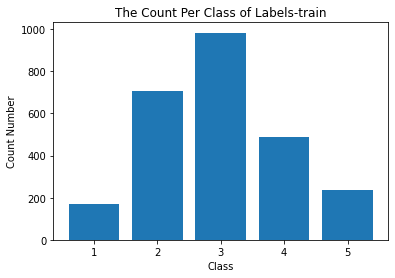

In [14]:
show_counts_per_class_of_labels(train, 'train')

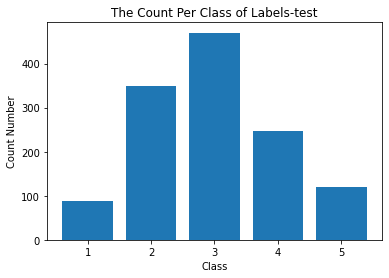

In [15]:
show_counts_per_class_of_labels(test, 'test')

### Wordcloud for data

In [16]:
from wordcloud import WordCloud

In [17]:
def create_wordcloud(data,data_name):
    
    # Generate a word cloud image
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(25,10))
    # lower max_font_size
    ax1.imshow(WordCloud(max_font_size=70).generate(str((data[data.Score==1])['Content'].values)), interpolation="bilinear")
    ax1.set_title('Score=1',fontsize=20)
    ax1.axis("off")
    ax2.imshow(WordCloud(max_font_size=70).generate(str((data[data.Score==2])['Content'].values)), interpolation="bilinear")
    ax2.set_title('Score=2',fontsize=20)
    ax2.axis("off")
    ax3.imshow(WordCloud(max_font_size=70).generate(str((data[data.Score==3])['Content'].values)), interpolation="bilinear")
    ax3.set_title('Score=3',fontsize=20)
    ax3.axis("off")
    ax4.imshow(WordCloud(max_font_size=70).generate(str((data[data.Score==4])['Content'].values)), interpolation="bilinear")
    ax4.set_title('Score=4',fontsize=20)
    ax4.axis("off")
    ax5.imshow(WordCloud(max_font_size=70).generate(str((data[data.Score==5])['Content'].values)), interpolation="bilinear")
    ax5.set_title('Score=5',fontsize=20)
    ax5.axis("off")
    ax6.axis("off")
    
    name = data_name + '.png'
    fig.savefig(name,bbox_inches='tight')
    plt.show()
    pass


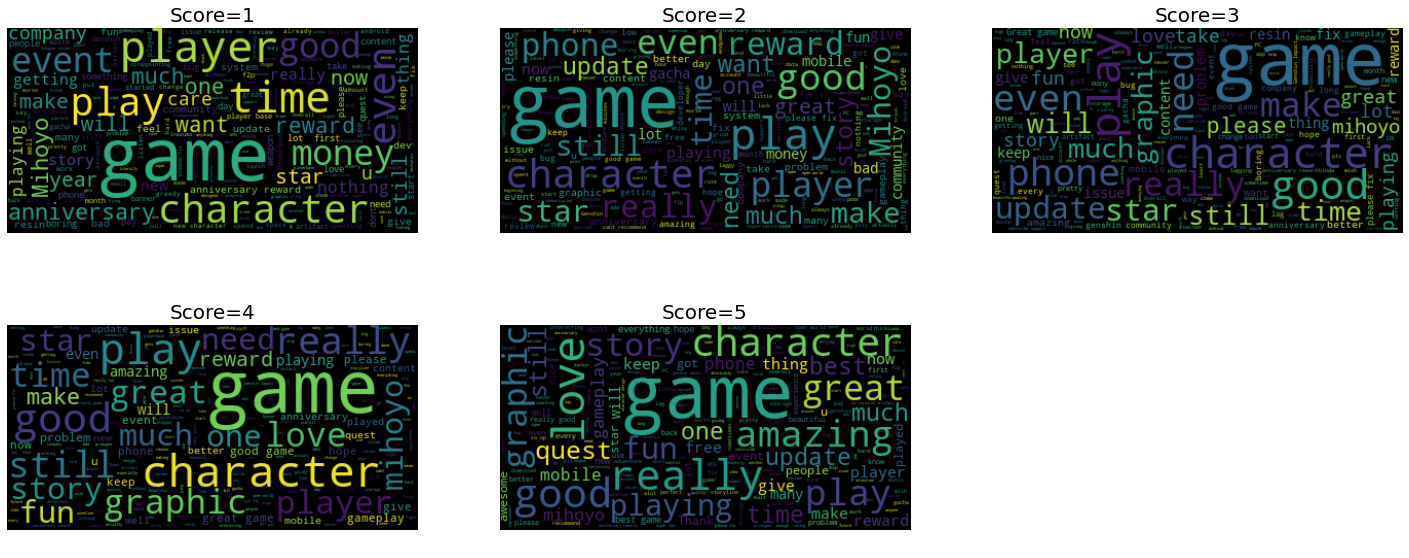

In [18]:
create_wordcloud(train,'Word_train')

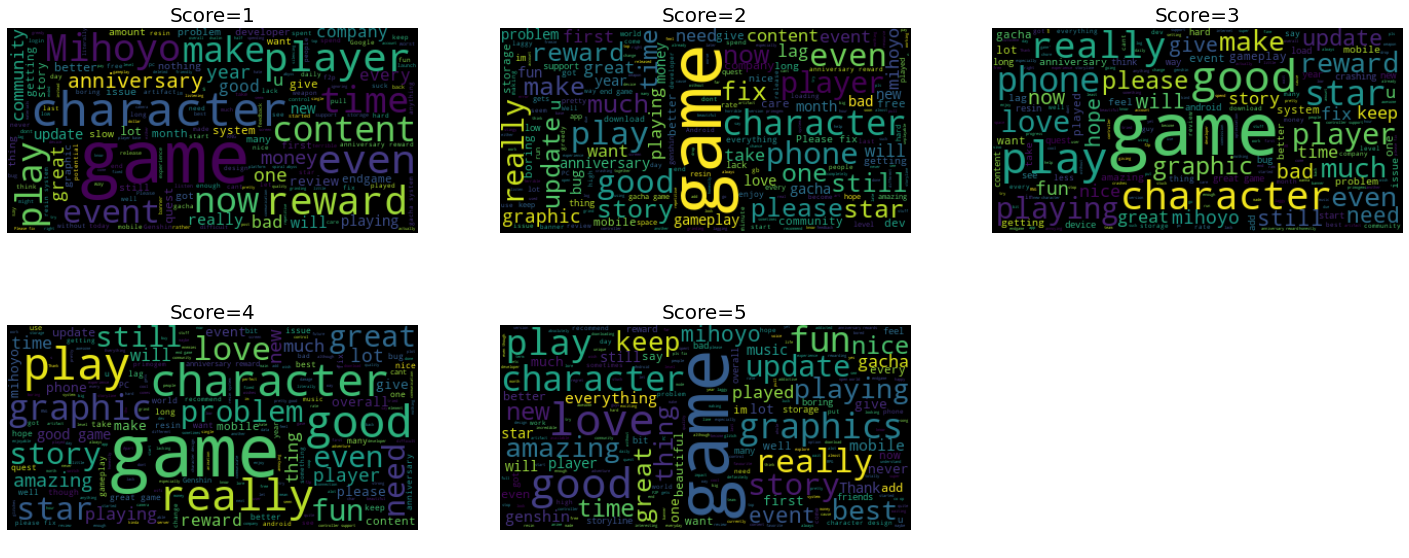

In [19]:
create_wordcloud(test,'Word_test')

In [20]:
import matplotlib.pyplot as plt

### Twitter

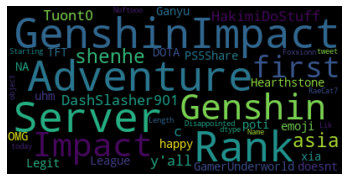

In [21]:
wc = WordCloud(max_font_size=70).generate(str(valid['tweet']))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.savefig('Word_valid.png',bbox_inches='tight')
plt.show()

## Data Cleaning

In [22]:
import spacy
import contextualSpellCheck
import re
import string

In [23]:
import emot
import pickle

In [24]:
# 'Emoji_Dict.p'- download link https://drive.google.com/open?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v
# https://medium.com/geekculture/text-preprocessing-how-to-handle-emoji-emoticon-641bbfa6e9e7
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
    Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [25]:
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("contextual spellchecker", config={"max_edit_dist": 5}) 
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

### Spell check and language detect

#### Google Play

In [26]:
train_filt = pd.DataFrame(columns=['Time', 'Score', 'Content'])
test_filt = pd.DataFrame(columns=['Time', 'Score', 'Content'])
valid_filt = pd.DataFrame(columns=['Time', 'Tweet'])
def spell_check_and_language_detect(data,data_filter, da_ty):
    if da_ty == 'google':
        for row in data.itertuples():
            idx = getattr(row, "Index")
            Time = getattr(row, "Time")
            Score = getattr(row, "Score")
            Content = getattr(row, "Content")
            Content=convert_emojis_to_word(Content)
            Content = re.sub(r'http\S+', '', strings)
            doc = nlp(Content)
            Content = doc._.outcome_spellCheck
            data_temp = pd.DataFrame({"Time":Time, "Score": Score, "Content": Content}, index=range(1))
            data_filter = pd.concat([data_filter, data_temp], join="inner", ignore_index=True)
            pass
        pass
    elif da_ty == 'twitter':
        for item in data.itertuples():
            idx = getattr(item,"Index")
            time = getattr(item,"created_at")
            tweet = getattr(item,"tweet")
            time = time.split(" ?")[0]
            tweet = convert_emojis_to_word(tweet)
            tweet = re.sub(r'http\S+', '', tweet)
            doc = nlp(tweet)
            tweet = doc._.outcome_spellCheck
            data_temp = pd.DataFrame({"Time":time, "Tweet": tweet}, index=range(1))
            data_filter = pd.concat([data_filter, data_temp], join="inner", ignore_index=True)
            pass
        pass
    return data_filter

In [27]:
# Use the filted data procceed before because of too long processing time
# train_filt = spell_check_and_language_detect(train,train_filt,'google')
# test_filt = spell_check_and_language_detect(test,test_filt,'google')
# train_filt.to_excel('train_data.xlsx', index=False)
# test_filt.to_excel('test_data.xlsx', index=False)

In [28]:
train_filt=pd.read_excel('train_data.xlsx')
test_filt=pd.read_excel('test_data.xlsx')

In [29]:
train_filt_na = train_filt.dropna()
train_filt_na = train_filt_na.reset_index(drop=True)

In [30]:
train_filt_na.shape 

(1655, 3)

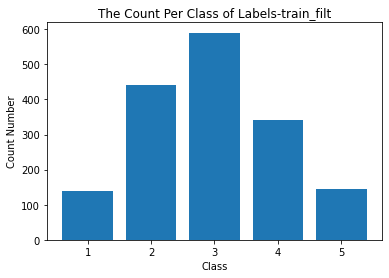

In [31]:
show_counts_per_class_of_labels(train_filt_na, "train_filt")

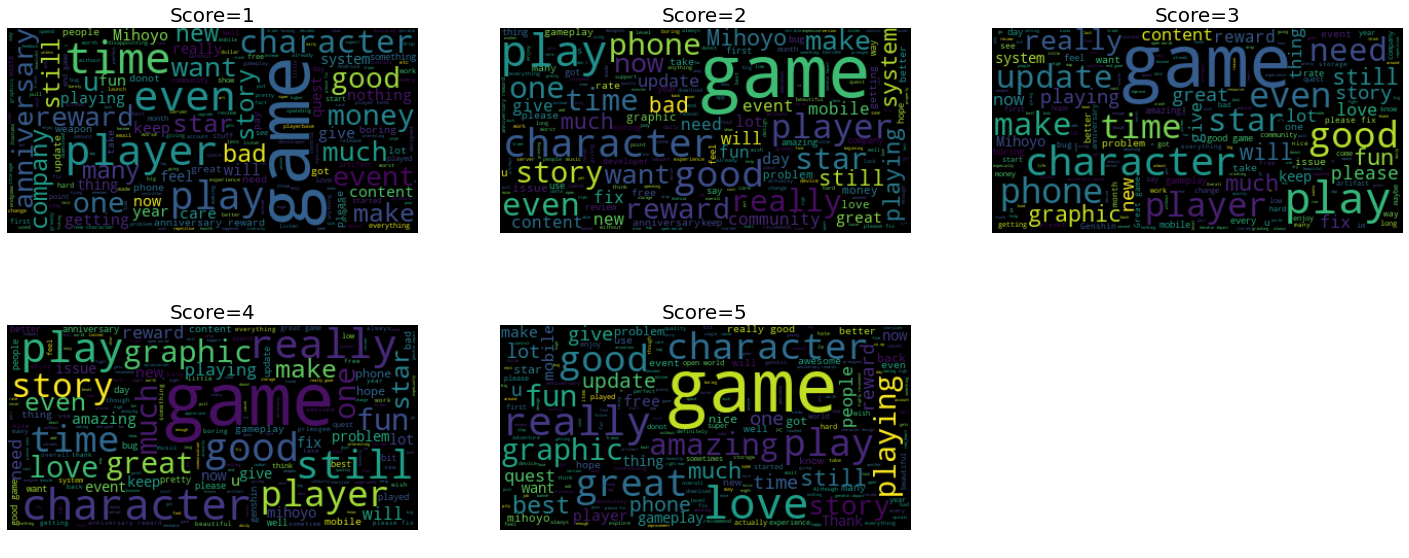

In [32]:
create_wordcloud(train_filt_na,'Word_train_filt')

In [33]:
test_filt_na = test_filt.dropna()
test_filt_na = test_filt_na.reset_index(drop=True)

In [34]:
test_filt_na.shape 

(837, 3)

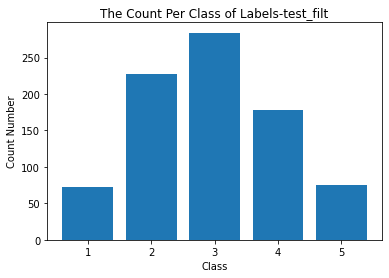

In [35]:
show_counts_per_class_of_labels(test_filt_na, "test_filt")

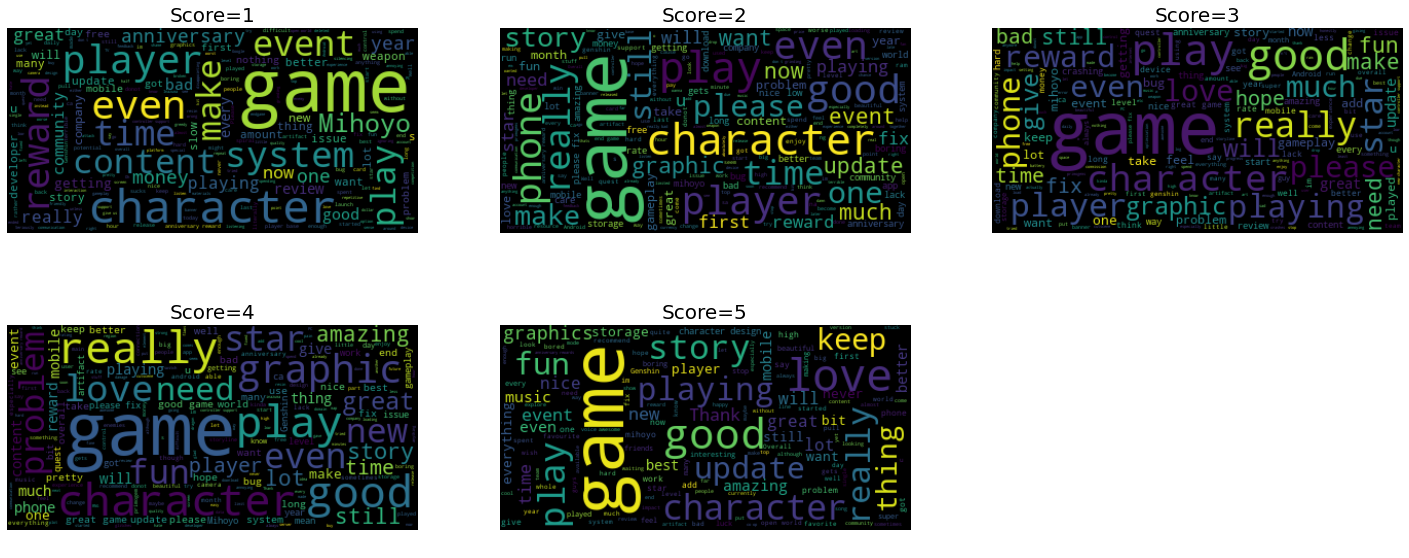

In [36]:
create_wordcloud(test_filt_na,'Word_test_filt')

### Twitter

In [37]:
# valid_filt = spell_check_and_language_detect(valid,valid_filt,'twitter')

In [38]:
# valid_filt.to_excel('valid_data.xlsx', index=False)

In [39]:
valid_filt=pd.read_excel('valid_data.xlsx')

In [40]:
valid_filt_na = valid_filt.dropna()
valid_filt_na = valid_filt_na.reset_index(drop=True)

In [41]:
valid_filt_na.shape 

(940, 2)

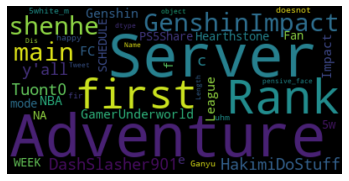

In [42]:
wc = WordCloud(max_font_size=70).generate(str(valid_filt_na['Tweet']))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.savefig('Word_valid_filt.png',bbox_inches='tight')
plt.show()

## Data Process

### Data Balance

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [45]:
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_stop==False and token.lemma_.isalpha()==True]

In [46]:
vectorizer = CountVectorizer(tokenizer=preprocess)

In [47]:
train_idx = train_filt_na.reset_index()
train_filt_x = train_idx.loc[:,['index','Score']]
train_filt_y = (train_idx['Score'].values).astype('int')

In [48]:
sm = SMOTE(random_state=2201)
train_idx_x, train_idx_y = sm.fit_resample(train_filt_x,train_filt_y)

In [49]:
train_bal = train_filt_na.iloc[train_idx_x['index'],:]

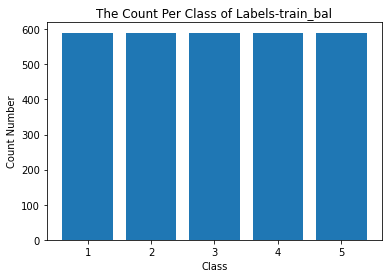

In [50]:
show_counts_per_class_of_labels(train_bal, "train_bal")

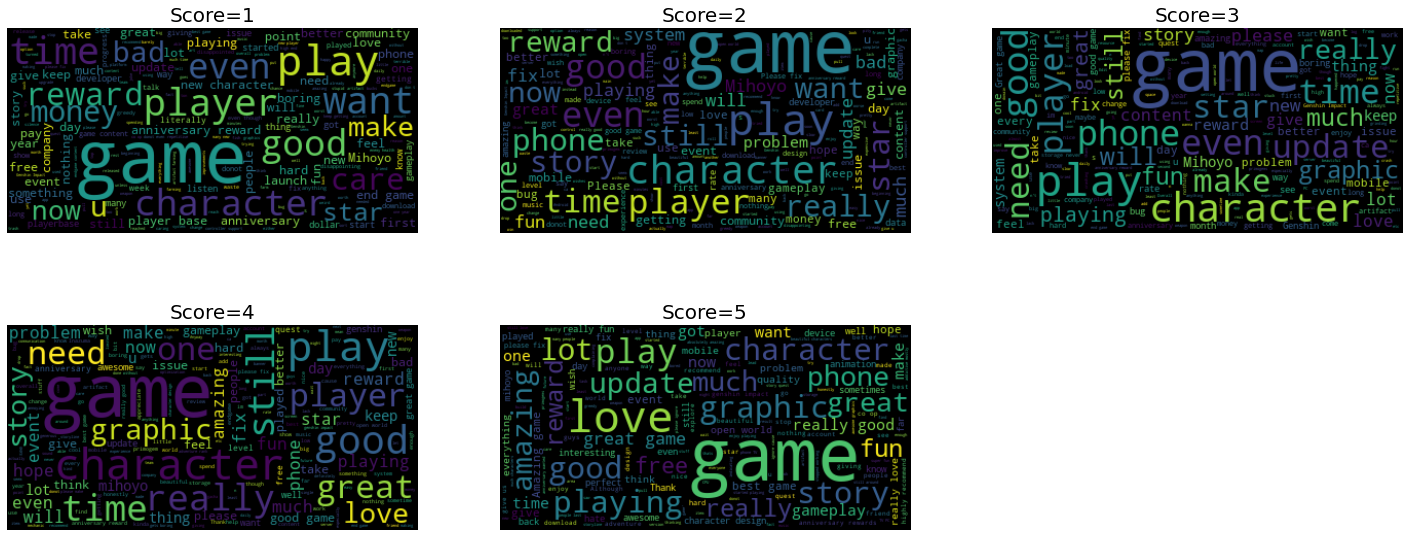

In [51]:
create_wordcloud(train_bal,'Word_train_bal')

In [52]:
# Because of too long processing time, I use the data proccessed before
# train_bal_x = vectorizer.fit_transform(train_bal['Content'])
# pickle.dump(train_bal_x, open('train_filt_x.pickle', 'wb'))
train_bal_x = pickle.load(open('train_filt_x.pickle', 'rb'))
train_bal_y = (train_bal['Score'].values).astype('int')

In [53]:
# Because of too long processing time, I use the data proccessed before
# test_filt_x = vectorizer.transform(test_filt_na['Content'])
# pickle.dump(test_filt_x, open('test_filt_x.pickle', 'wb'))
test_filt_x = pickle.load(open('test_filt_x.pickle', 'rb'))
test_filt_y = (test_filt_na['Score'].values).astype('int')

In [54]:
# pickle.dump(vectorizer, open('vectorizer.pickle', 'wb'))

## Non-deep learning methods

In [55]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import auc
from sklearn.metrics import cohen_kappa_score

lsvc_model = LinearSVC() 
lsvc_model.fit(train_bal_x, train_bal_y) 
lsvc_test_pred = lsvc_model.predict(test_filt_x)
lsvc_kappa = cohen_kappa_score(test_filt_y, lsvc_test_pred)
print(lsvc_kappa)
lsvc_fbeta = fbeta_score(test_filt_y, lsvc_test_pred,  average='macro', beta=1.0)
print(lsvc_fbeta)
fpr, tpr, thresholds = roc_curve(test_filt_y, lsvc_test_pred, pos_label=5)
lsvc_auc = auc(fpr, tpr)
print(lsvc_auc)


0.09278267007648977
0.2892893927490623
0.6499125109361329


E:\Anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr_model = LogisticRegression(random_state=2201,multi_class="multinomial", solver="lbfgs", max_iter=1000)
lr_model.fit(train_bal_x, train_bal_y)
lr_test_pred = lr_model.predict(test_filt_x)
lr_kappa = cohen_kappa_score(test_filt_y, lr_test_pred)
print(lr_kappa)
lr_fbeta = fbeta_score(test_filt_y, lr_test_pred,  average='macro', beta=1.0)
print(lr_fbeta)
fpr, tpr, thresholds = roc_curve(test_filt_y, lr_test_pred, pos_label=5)
lr_auc = auc(fpr, tpr)
print(lr_auc)


0.14024130343792118
0.3333892145293246
0.6831758530183727


## deep learning methods

### Data Balance

In [58]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow_addons as tfa

tfds.disable_progress_bar()

In [59]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(['train_'+metric, 'test_'+metric])

In [60]:
train_ds = train_bal.iloc[:,1:3]
test_ds = test_filt_na.iloc[:,1:3]

### Simple RNN

In [61]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [62]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_ds['Content'])
train_ds_tf_x = tokenizer.texts_to_sequences(train_ds['Content']) 
test_ds_tf_x = tokenizer.texts_to_sequences(test_ds['Content'])

In [63]:
vocab_size = len(tokenizer.word_index) + 1 # Adding 1 because of reserved 0 index

In [64]:
maxlen = 100 
embedding_dim = 50
# keeping the last maxlen words, if two long.
train_dp_x = pad_sequences(train_ds_tf_x, padding='post', maxlen=maxlen) 
test_dp_x = pad_sequences(test_ds_tf_x, padding='post', maxlen=maxlen)
train_dp_y=tf.keras.utils.to_categorical(train_ds['Score'].astype('float32').values,num_classes=6)
test_dp_y=tf.keras.utils.to_categorical(test_ds['Score'].astype('float32').values,num_classes=6)


In [65]:
RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid'),
])

In [66]:
RNN_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=[tfa.metrics.CohenKappa(num_classes=6, name='Kappa'), 
                       tfa.metrics.FBetaScore(num_classes=6, name= 'fbeta_score',average="macro",threshold=0.9),
                       tf.keras.metrics.AUC(from_logits=True, name='AUC')])

In [67]:
RNN_history = RNN_model.fit(train_dp_x,train_dp_y, epochs=20,validation_data=(test_dp_x, test_dp_y),batch_size=20)

Epoch 1/20
148/148 [==============================] - 6s 17ms/step - loss: 1.7046 - Kappa: 0.1064 - fbeta_score: 0.0000e+00 - AUC: 0.6231 - val_loss: 1.6288 - val_Kappa: 0.0657 - val_fbeta_score: 0.0000e+00 - val_AUC: 0.6521
Epoch 2/20
148/148 [==============================] - 2s 13ms/step - loss: 1.5634 - Kappa: 0.2089 - fbeta_score: 0.0000e+00 - AUC: 0.6684 - val_loss: 1.5963 - val_Kappa: 0.0484 - val_fbeta_score: 0.0000e+00 - val_AUC: 0.6420
Epoch 3/20
148/148 [==============================] - 2s 13ms/step - loss: 1.4818 - Kappa: 0.2657 - fbeta_score: 0.0886 - AUC: 0.6901 - val_loss: 1.5482 - val_Kappa: 0.0836 - val_fbeta_score: 0.1433 - val_AUC: 0.6589
Epoch 4/20
148/148 [==============================] - 2s 13ms/step - loss: 1.4130 - Kappa: 0.3373 - fbeta_score: 0.1883 - AUC: 0.7084 - val_loss: 1.5355 - val_Kappa: 0.0877 - val_fbeta_score: 0.1888 - val_AUC: 0.6633
Epoch 5/20
148/148 [==============================] - 2s 13ms/step - loss: 1.3401 - Kappa: 0.4309 - fbeta_score: 0.2

In [68]:
test_loss, test_score_1, test_score_2, test_score_3 = RNN_model.evaluate(test_dp_x, test_dp_y)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_score_1)
print('Test Accuracy:', test_score_2)
print('Test Accuracy:', test_score_3)

27/27 [==============================] - 0s 8ms/step - loss: 1.4923 - Kappa: 0.0598 - fbeta_score: 0.2646 - AUC: 0.7030
Test Loss: 1.4923090934753418
Test Accuracy: 0.05981040000915527
Test Accuracy: 0.26457086205482483
Test Accuracy: 0.7030255198478699


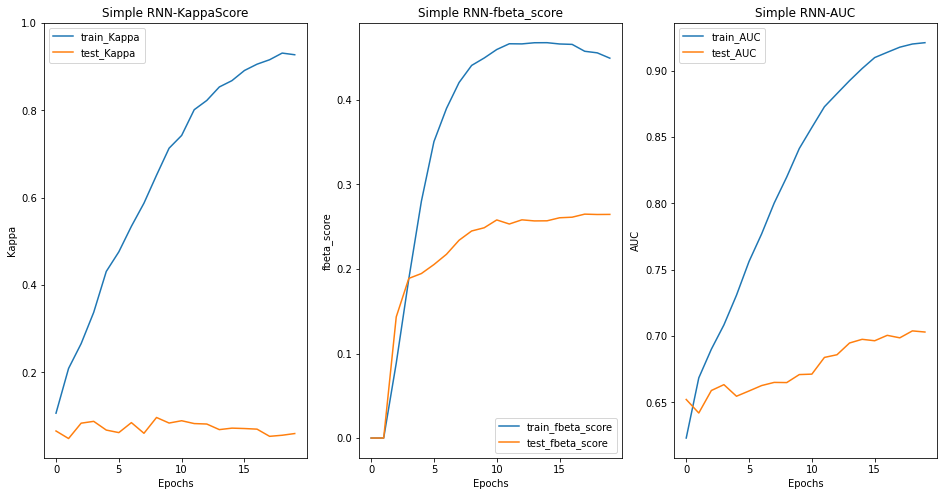

In [69]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plot_graphs(RNN_history, 'Kappa')
plt.ylim(None, 1)
plt.title('Simple RNN-KappaScore')
plt.subplot(1, 3, 2)
plot_graphs(RNN_history, 'fbeta_score')
plt.title('Simple RNN-fbeta_score')
plt.subplot(1, 3, 3)
plot_graphs(RNN_history, 'AUC')
plt.title('Simple RNN-AUC')
plt.savefig('Result-RNN', bbox_inches='tight')

### BiLSTM

In [70]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(6, activation='sigmoid'),
])

In [71]:
LSTM_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(1e-4),
                   metrics=[tfa.metrics.CohenKappa(num_classes=6, name='Kappa'), 
                            tfa.metrics.FBetaScore(num_classes=6, name= 'fbeta_score',average="macro",threshold=0.9),
                            tf.keras.metrics.AUC(from_logits=True, name='AUC')])

In [72]:
LSTM_history = LSTM_model.fit(train_dp_x,train_dp_y,validation_data=(test_dp_x, test_dp_y), epochs=20,batch_size=20)

Epoch 1/20
148/148 [==============================] - 10s 33ms/step - loss: 1.7329 - Kappa: 0.0089 - fbeta_score: 0.0000e+00 - AUC: 0.6016 - val_loss: 1.5843 - val_Kappa: 0.0133 - val_fbeta_score: 0.0000e+00 - val_AUC: 0.6843
Epoch 2/20
148/148 [==============================] - 3s 23ms/step - loss: 1.5961 - Kappa: 0.0555 - fbeta_score: 0.0000e+00 - AUC: 0.6429 - val_loss: 1.5887 - val_Kappa: 0.0830 - val_fbeta_score: 0.0000e+00 - val_AUC: 0.6591
Epoch 3/20
148/148 [==============================] - 3s 24ms/step - loss: 1.5438 - Kappa: 0.1220 - fbeta_score: 0.0000e+00 - AUC: 0.7001 - val_loss: 1.5863 - val_Kappa: 0.0651 - val_fbeta_score: 0.0000e+00 - val_AUC: 0.6473
Epoch 4/20
148/148 [==============================] - 4s 24ms/step - loss: 1.5019 - Kappa: 0.1792 - fbeta_score: 0.0000e+00 - AUC: 0.7289 - val_loss: 1.5426 - val_Kappa: 0.0829 - val_fbeta_score: 0.0000e+00 - val_AUC: 0.6842
Epoch 5/20
148/148 [==============================] - 3s 23ms/step - loss: 1.3911 - Kappa: 0.2970 -

In [73]:
test_loss, test_score_1, test_score_2, test_score_3 = LSTM_model.evaluate(test_dp_x, test_dp_y)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_score_1)
print('Test Accuracy:', test_score_2)
print('Test Accuracy:', test_score_3)

27/27 [==============================] - 0s 13ms/step - loss: 1.9717 - Kappa: 0.1137 - fbeta_score: 0.2033 - AUC: 0.7460
Test Loss: 1.971697449684143
Test Accuracy: 0.11368846893310547
Test Accuracy: 0.2033090442419052
Test Accuracy: 0.7459906339645386


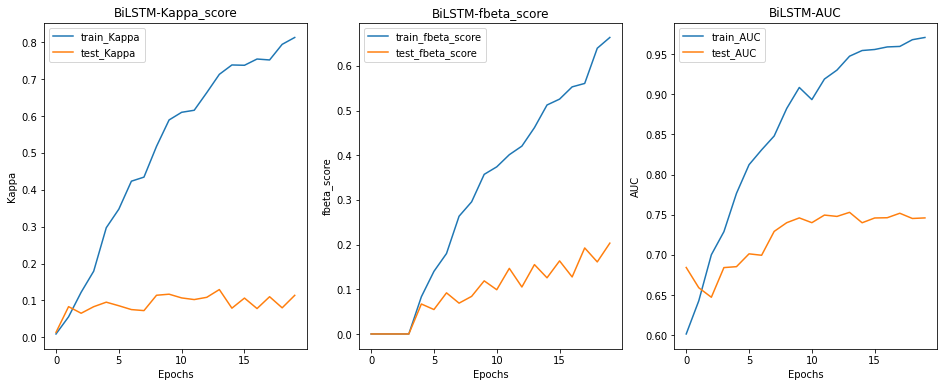

In [74]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plot_graphs(LSTM_history, 'Kappa')
plt.title('BiLSTM-Kappa_score')
plt.subplot(1, 3, 2)
plot_graphs(LSTM_history, 'fbeta_score')
plt.title('BiLSTM-fbeta_score')
plt.subplot(1, 3, 3)
plot_graphs(LSTM_history, 'AUC')
plt.title('BiLSTM-AUC')
plt.savefig('Result-LSTM', bbox_inches='tight')

### BERT

In [75]:
# !wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [76]:
import tensorflow_hub as hub
import tokenization
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True)

INFO:absl:Using C:\Users\ShiCJ\AppData\Local\Temp\tfhub_modules to cache modules.


In [77]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [78]:
def build_BERT_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(6, activation='softmax')(net)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), 
                  loss='categorical_crossentropy', 
                  metrics=[tfa.metrics.CohenKappa(num_classes=6, name='Kappa'), 
                           tfa.metrics.FBetaScore(num_classes=6, name= 'fbeta_score',average="macro",threshold=0.9),
                            tf.keras.metrics.AUC(from_logits=True, name='AUC')])
    
    return model

In [79]:
max_len = 100
train_input = bert_encode(train_ds['Content'].values, tokenizer, max_len=max_len)
test_input = bert_encode(test_ds['Content'].values, tokenizer, max_len=max_len)
train_labels = tf.keras.utils.to_categorical(train_ds['Score'].values, num_classes=6)
test_labels = tf.keras.utils.to_categorical(test_ds['Score'].values, num_classes=6)

In [80]:
BERT_model = build_BERT_model(bert_layer, max_len=max_len)

In [81]:
BERT_history = BERT_model.fit(train_input, train_labels,validation_data=(test_input, test_labels), epochs=20,batch_size=20)

Epoch 1/20
148/148 [==============================] - 77s 438ms/step - loss: 1.5056 - Kappa: 0.1937 - fbeta_score: 0.0028 - AUC: 0.7375 - val_loss: 1.4684 - val_Kappa: 0.1793 - val_fbeta_score: 0.0128 - val_AUC: 0.7613
Epoch 2/20
148/148 [==============================] - 62s 423ms/step - loss: 1.0478 - Kappa: 0.4534 - fbeta_score: 0.0736 - AUC: 0.8882 - val_loss: 1.4112 - val_Kappa: 0.2040 - val_fbeta_score: 0.0984 - val_AUC: 0.7967
Epoch 3/20
148/148 [==============================] - 61s 413ms/step - loss: 0.6882 - Kappa: 0.6559 - fbeta_score: 0.2339 - AUC: 0.9531 - val_loss: 1.5796 - val_Kappa: 0.2169 - val_fbeta_score: 0.1355 - val_AUC: 0.7917
Epoch 4/20
148/148 [==============================] - 64s 434ms/step - loss: 0.4642 - Kappa: 0.7818 - fbeta_score: 0.3724 - AUC: 0.9787 - val_loss: 1.6714 - val_Kappa: 0.2315 - val_fbeta_score: 0.1368 - val_AUC: 0.8033
Epoch 5/20
148/148 [==============================] - 63s 427ms/step - loss: 0.3167 - Kappa: 0.8648 - fbeta_score: 0.5031 - 

In [82]:
test_loss, test_score_1, test_score_2, test_score_3 = BERT_model.evaluate(test_input,test_labels)
print('Test Loss:', test_loss)
print('Test score_1:', test_score_1)
print('Test score_2:', test_score_2)
print('Test score_3:', test_score_3)

27/27 [==============================] - 7s 251ms/step - loss: 3.3194 - Kappa: 0.2574 - fbeta_score: 0.3086 - AUC: 0.7402
Test Loss: 3.3194053173065186
Test score_1: 0.2574462890625
Test score_2: 0.3086247742176056
Test score_3: 0.7401706576347351


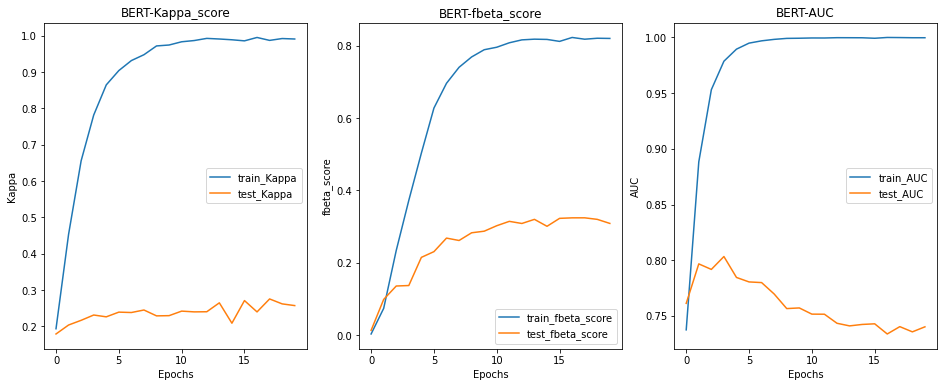

In [83]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plot_graphs(BERT_history, 'Kappa')
plt.title('BERT-Kappa_score')
plt.subplot(1, 3, 2)
plot_graphs(BERT_history, 'fbeta_score')
plt.title('BERT-fbeta_score')
plt.subplot(1, 3, 3)
plot_graphs(BERT_history, 'AUC')
plt.title('BERT-AUC')
plt.savefig('Result-BERT', bbox_inches='tight')

# Summary

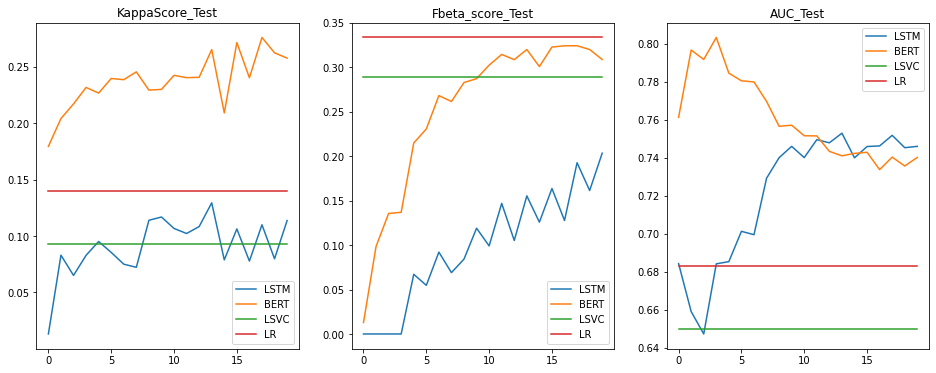

In [84]:
plt.figure(figsize=(16, 6))


plt.subplot(1, 3, 1)
plt.plot(LSTM_history.history['val_Kappa'], label='LSTM')
plt.plot(BERT_history.history['val_Kappa'], label='BERT')
plt.plot([lsvc_kappa]*20, label='LSVC')
plt.plot([lr_kappa]*20, label='LR')
plt.legend()
plt.title('KappaScore_Test')

plt.subplot(1, 3, 2)
plt.plot(LSTM_history.history['val_fbeta_score'], label='LSTM')
plt.plot(BERT_history.history['val_fbeta_score'], label='BERT')
plt.plot([lsvc_fbeta]*20, label='LSVC')
plt.plot([lr_fbeta]*20, label='LR')
plt.legend()
plt.title('Fbeta_score_Test')

plt.subplot(1, 3, 3)
plt.plot(LSTM_history.history['val_AUC'], label='LSTM')
plt.plot(BERT_history.history['val_AUC'], label='BERT')
plt.plot([lsvc_auc]*20, label='LSVC')
plt.plot([lr_auc]*20, label='LR')
plt.legend()
plt.title('AUC_Test')

plt.savefig('Result-Summary', bbox_inches='tight')

# Twitter

In [85]:
valid_input=bert_encode(valid_filt_na['Tweet'].values, tokenizer, max_len=max_len)

In [86]:
valid_filt_na['Score']=[np.argmax(pred) for pred in BERT_model.predict(valid_input)]

In [87]:
valid_res = valid_filt_na
valid_res.to_excel('valid_res.xlsx', index=False)
valid_res

Time                                              Tweet  \
0    2022-01-10 00:59:55  @DashSlasher901 @HakimiDoStuff @Tuont0 y'all c...   
1    2022-01-10 00:59:53  @GamerUnderworld @GenshinImpact But the main e...   
2    2022-01-10 00:59:48  NBA 2 League Genshin Impact FC  Hearthstone  I...   
3    2022-01-10 00:59:46  My Server: NA My Adventure Rank: 38 My first 5...   
4    2022-01-10 00:59:18  #PS5Share, #GenshinImpact #shenhe # SHENHE IS ...   
..                   ...                                                ...   
935  2022-01-09 18:54:24  My Server: 1 My Adventure Rank: 57 My first 5w...   
936  2022-01-09 18:54:13  SCHEDULE FOR THE WEEK!!! 1/10-1/16 Fan mode: f...   
937  2022-01-09 18:53:55  server: main adventure rank: 57 first 5white_m...   
938  2022-01-09 18:53:48  I uhm- My Server:1 My Adventure Rank:56 My fir...   
939  2022-01-09 18:53:47  Ganyu doesnot have a happy or pensive_face Dis...   

     Score  
0        5  
1        4  
2        5  
3        4  
4        5  
..     ...  
935      4  
936      5  
937      3  
938      4  
939      4  

[940 rows x 3 columns]

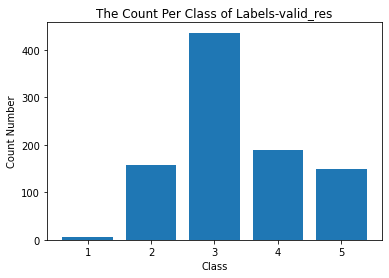

In [88]:
show_counts_per_class_of_labels(valid_res, "valid_res")

# Reference

https://www.tensorflow.org/text/tutorials/classify_text_with_bert

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

https://github.com/JoMingyu/google-play-scraper

https://spacy.io/universe/project/contextualspellcheck/

https://spacy.io/universe/project/spacy_fastlang/

https://amueller.github.io/word_cloud/

https://www.tensorflow.org/text/tutorials/text_classification_rnn

https://www.tensorflow.org/guide/keras/rnn

https://www.analyticsvidhya.com/blog/2020/10/simple-text-multi-classification-task-using-keras-bert/

https://medium.com/@kevctae/twitter-scraping-without-using-twitter-api-2022-guide-39eaec7ccade